In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
%pylab --no-import-all inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


# TWS: Traveling Wave Structure

TWS are defined by special fieldmaps

In [3]:
from astra import Astra, AstraGenerator
from astra.fieldmaps import expand_tws_fmap
import os

In [4]:
# Input template file 
ASTRA_IN = '../templates/tws/astra.in'
GENERATOR_IN = '../templates/tws/generator.in'

In [5]:
G = AstraGenerator(GENERATOR_IN)
G.run()
P0 = G.output['particles']

In [6]:
# Make an Astra object
A = Astra(input_file=ASTRA_IN, initial_particles = P0, verbose=True)

# Turn off space charge for this example
A.input['charge']['lspch'] = False

# This has a TWS cavity
A.input['cavity']

{'lefield': True,
 'file_efield(1)': '/Users/chrisonian/Code/GitHub/lume-astra/examples/templates/tws/sonde_ideal_SF_100.dat',
 'nue(1)': 2.99855,
 'maxe(1)': 80,
 'phi(1)': 0,
 'c_pos(1)': 0,
 'c_smooth(1)': 0,
 'file_efield(2)': '/Users/chrisonian/Code/GitHub/lume-astra/examples/templates/tws/tws.dat',
 'nue(2)': 2.99855,
 'maxe(2)': 14,
 'phi(2)': 0,
 'c_pos(2)': 1.528,
 'c_smooth(2)': 0,
 'c_numb(2)': 135}

In [7]:
# This is the fieldmap
A.load_fieldmaps()
fmap = A.fieldmap['tws.dat']

# Attributes
fmap['attrs']

Loading fieldmap file /Users/chrisonian/Code/GitHub/lume-astra/examples/templates/tws/sonde_ideal_SF_100.dat
Loading fieldmap file /Users/chrisonian/Code/GitHub/lume-astra/examples/templates/tws/tws.dat
Loading fieldmap file /Users/chrisonian/Code/GitHub/lume-astra/examples/templates/tws/B3CV_23cm_sstilt.dat


{'type': 'astra_tws', 'z1': 0.0463882, 'z2': 0.146368, 'n': 1, 'm': 3}

In [8]:
# Actual data 
fmap['data'].shape

(101, 2)

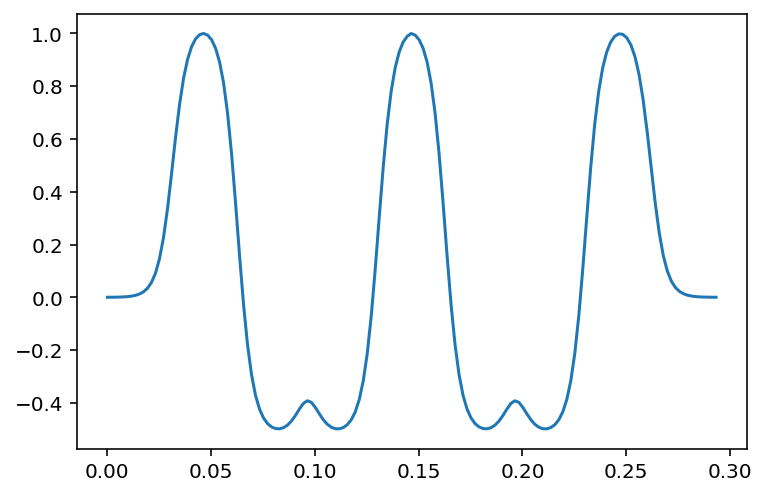

In [9]:
# This expands the data for 6 cells
zfull, Ezfull = expand_tws_fmap(fmap, 6)

plt.plot(zfull, Ezfull)

In [10]:
# Run
A.run()

Initial particles written to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpqfdxl0gv/astra.particles
3 fieldmaps written to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpqfdxl0gv
/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpqfdxl0gv/astra.particles exists, will not symlink
Path does not exist for symlink: RAD
Path does not exist for symlink: RAD
Path does not exist for symlink: RAD
Path does not exist for symlink: RAD
Path does not exist for symlink: RAD
Path does not exist for symlink: RAD
Path does not exist for symlink: RAD
Path does not exist for symlink: RAD
Path does not exist for symlink: RAD
Path does not exist for symlink: RAD
Path does not exist for symlink: RAD
Path does not exist for symlink: RAD
Path does not exist for symlink: RAD
Path does not exist for symlink: RAD
 --------------------------------------------------------------------------

               Astra- A space charge tracking algorithm 
                 Version 3.2 - macOS 64bit - Intel   
  

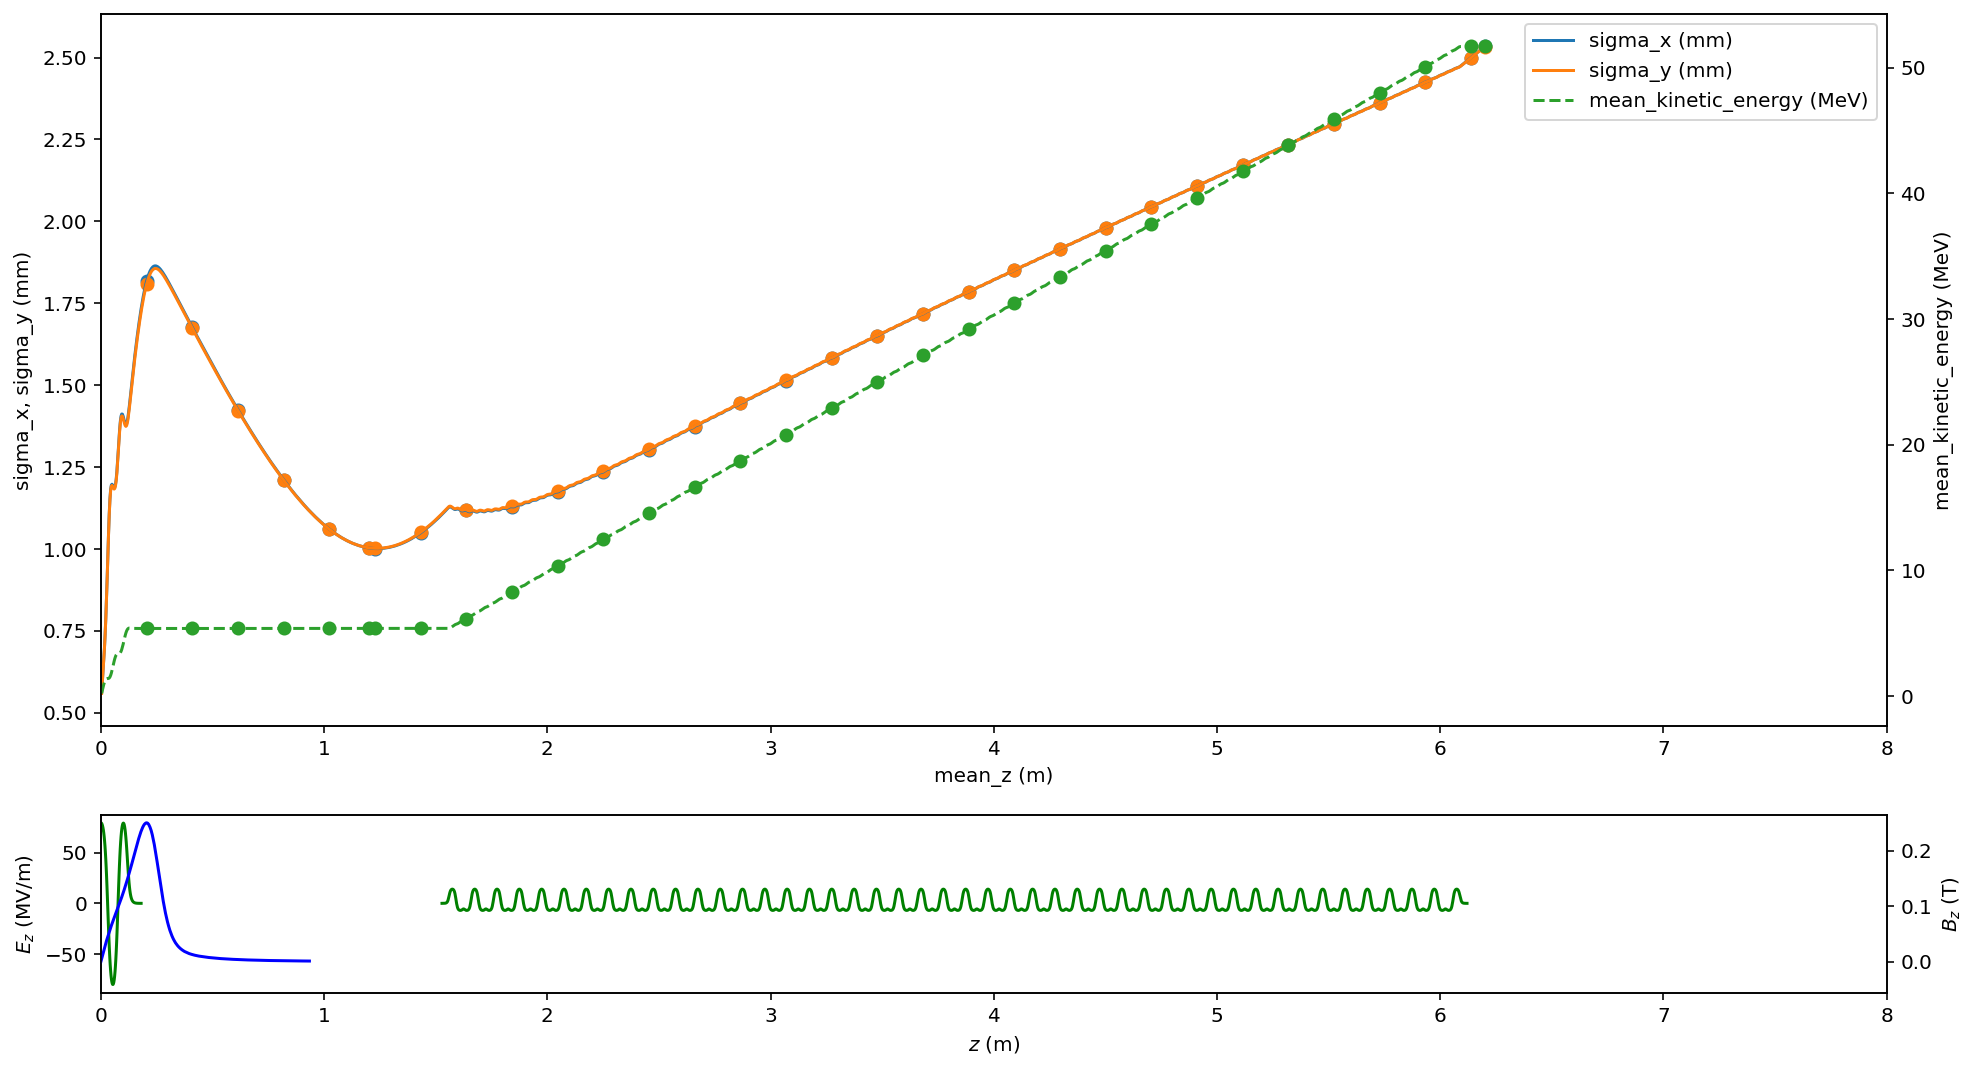

In [11]:
A.plot(y=['sigma_x', 'sigma_y'], y2='mean_kinetic_energy', xlim=(0,8), figsize=(16,9))

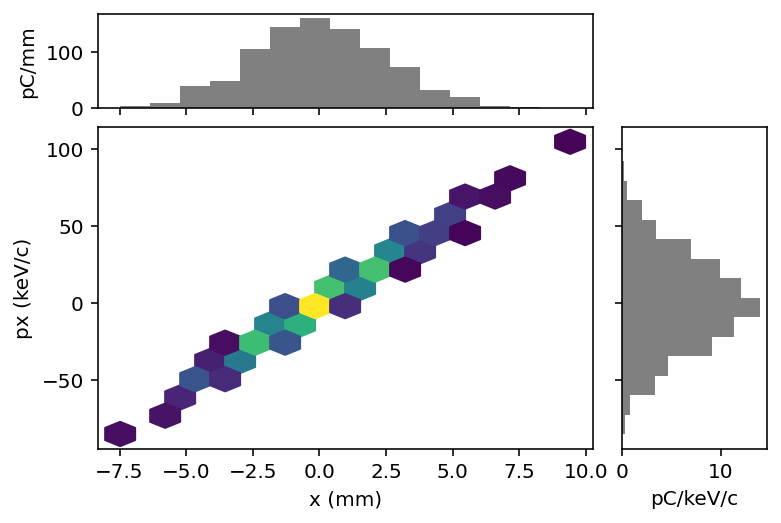

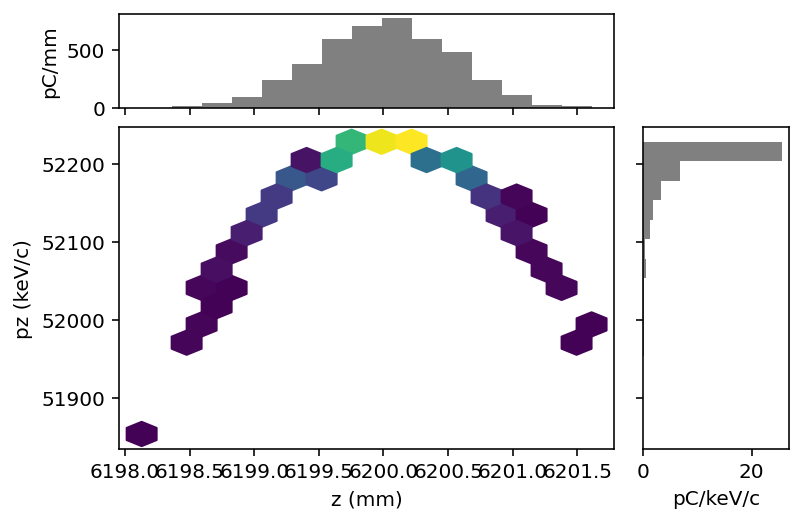

In [12]:
P = A.particles[-1]
P.plot('x', 'px')
P.plot('z', 'pz')